#  No-show appointments dataset investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. As we start investigating we will try to answer the question about What are the factors and attributes to predict if a patient will show up for their scheduled appointment?  

In [1]:
#importing packages that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> in this section we will load the data-set and have better understanding for the different attributes

### General Properties

In [2]:
#loading and reading the csv file 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
sum(df.duplicated())#checking the number of duplicates in the data

0

#### Great! No duplicates were found

In [5]:
df.nunique()#print number of unique values  for each column

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>the numbers of the unique values in *age* and *Handcap* columns are a little bit unusual let us see the unique values for each column

In [6]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

> It seems to be as levels of handicap, so it is ok

In [7]:
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

>as we can see -1 is not a posible value as age let us see the rows that contains this value

In [8]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Next step: data Cleaning and fixing some issues
> In this step we will do the following:
>>1. Rename the misspelt columns names.
>>2. Drop the rows with bad entries.
>>3. Change the data types for columns with wrong data types.
>>4. Adding new columns that will help us answering the questions.

In [9]:
#1. rename the misspelt columns and fixing the name of no-show to No_show
df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'}, inplace = True)

In [10]:
#2.droping the row with age = -1
df.drop(index= 99832, inplace= True)
df.query('Age == -1')# making sure the row was succesfuly droped

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [11]:
# changing data types:
df['PatientId'] = df['PatientId'].astype('int64')# changing the PatientId column's data type from float to int
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])#changing the ScheduledDay column's data type from string to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])#changing the AppointmentDay column's data type from string to datetime
df['ScheduledWeekday'] = df['ScheduledDay'].dt.weekday_name# Adding new column ScheduledWeekday to get the day of the week   
df['AppointmentWeekday'] = df['AppointmentDay'].dt.weekday_name # Adding new column ScheduledWeekday to get the day of the week 

In [12]:
df.info()# making sure the changes went well

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
PatientId             110526 non-null int64
AppointmentID         110526 non-null int64
Gender                110526 non-null object
ScheduledDay          110526 non-null datetime64[ns]
AppointmentDay        110526 non-null datetime64[ns]
Age                   110526 non-null int64
Neighbourhood         110526 non-null object
Scholarship           110526 non-null int64
Hypertension          110526 non-null int64
Diabetes              110526 non-null int64
Alcoholism            110526 non-null int64
Handicap              110526 non-null int64
SMS_received          110526 non-null int64
No_show               110526 non-null object
ScheduledWeekday      110526 non-null object
AppointmentWeekday    110526 non-null object
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 14.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Which gender at a given age group is more likely to not show for their appointment?

>First of all, let us calculate the total_*no_show_proportion*, and two functions  *draw_barchart()* and *plot_pie()* as they will help us later in answring the question an graphing

In [13]:
total_no_show_proportion= df.query('No_show == "Yes"')['AppointmentID'].count()/df['AppointmentID'].count()
total_no_show_proportion

0.20193438647919945

In [14]:
def draw_barchart(bars_list,bars_hight,width,color,title= None,x_lable= None, y_lable=None):
    """this function takes bars_list,bars_hight,width,color, title, x_lable and y_lable
    as parameters graphs a bar chart for the given list
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.bar(bars_list, bars_hight, width, color= color, label='Red Wine')
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    ax.axhline(total_no_show_proportion, color="gray")
    
def plot_pie(fracs,labels,colors,title):
    plt.pie(fracs,labels=labels,colors= colors)
    plt.title(title)

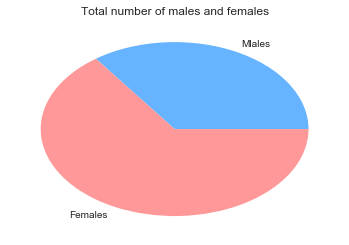

In [15]:
females= df.query('Gender == "F"')['Gender'].count() #geting the total number of females
males= df.query('Gender == "M"')['Gender'].count() #geting the total number of males
plot_pie([males,females], ['Mlales','Females'],['#66b3ff','#ff9999'],'Total number of males and females')

In [16]:
# creating new column called AgeGroup that classify ages into grops with 10 years range
bin_edges=[0,10,20,30,40,50,60,70,80,90,100,110,120]
bin_names=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduledWeekday,AppointmentWeekday,AgeGroup
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,61-70
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,51-60
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,61-70
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0-10
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,51-60


In [17]:
df.query('Gender == "M"').groupby(['AgeGroup'])['AppointmentID'].count()#seeing each age group count for males 

AgeGroup
0-10       8067
11-20      4822
21-30      3553
31-40      4526
41-50      4484
51-60      4929
61-70      3669
71-80      1896
81-90       835
91-100       88
101-110       0
111-120       0
Name: AppointmentID, dtype: int64

>It seems like there is no males above 100 it will cause a problem (trying to divide over zero), but no problem we will handle it using numby functions

In [18]:
df.query('Gender == "F"').groupby(['AgeGroup'])['AppointmentID'].count() #seeing each age group count for females 

AgeGroup
0-10        7143
11-20       8277
21-30      10230
31-40      10526
41-50       9936
51-60      10732
61-70       7520
71-80       3825
81-90       1709
91-100       213
101-110        2
111-120        5
Name: AppointmentID, dtype: int64

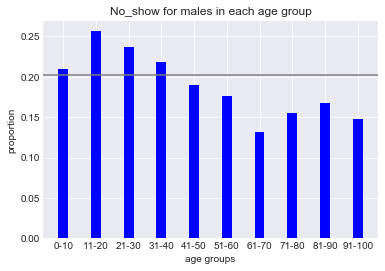

In [19]:
#ploting bar chart for males' different age groups
np.seterr(divide='ignore', invalid='ignore')# ignoring the divide by zero
ns_m_age_groups= np.array(df.query('Gender == "M" & No_show == "Yes"').groupby(['AgeGroup'])['AppointmentID'].count())
m_age_groups= np.array(df.query('Gender == "M"').groupby(['AgeGroup'])['AppointmentID'].count())
m_ns_propotion = np.true_divide(ns_m_age_groups, m_age_groups)
draw_barchart(bin_names,m_ns_propotion,0.3,'b','No_show for males in each age group','age groups', 'proportion')

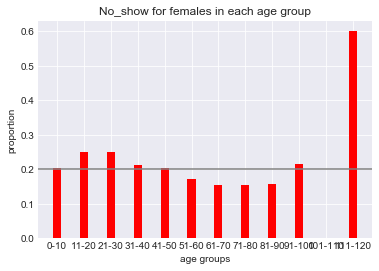

In [20]:
#ploting bar chart for females' different age groups
ns_f_age_groups= np.array(df.query('Gender == "F" & No_show == "Yes"').groupby(['AgeGroup'])['AppointmentID'].count())
f_age_groups= np.array(df.query('Gender == "F"').groupby(['AgeGroup'])['AppointmentID'].count())
f_ns_proportion = np.true_divide(ns_f_age_groups, f_age_groups)
draw_barchart(bin_names,f_ns_proportion,0.3,'r','No_show for females in each age group','age groups', 'proportion')

> It seems like for males and females in (11-30) age groups are more likely to not show up for their appointments. Also, females from (111-120) have the highest chance to not show up their appointments.

### Which of patient attributes have effect on the chances of the patient to not show for his appoinment?

In [21]:
 #getting the proportion for each category
Diabetes_proportion = df.query('No_show == "Yes" & Diabetes == 1 ')['Diabetes'].count()/df.query('Diabetes == 1 ')['Diabetes'].count()
Alcoholism_proportion= df.query('No_show == "Yes" & Alcoholism == 1 ')['Diabetes'].count()/df.query('Alcoholism == 1 ')['Diabetes'].count()
Hypertension_proportion= df.query('No_show == "Yes" & Hypertension == 1 ')['Diabetes'].count()/df.query('Hypertension == 1 ')['Diabetes'].count()
Handicap_proportion= df.query('No_show == "Yes" & Handicap != 0 ')['Diabetes'].count()/df.query('Handicap != 0 ')['Diabetes'].count()

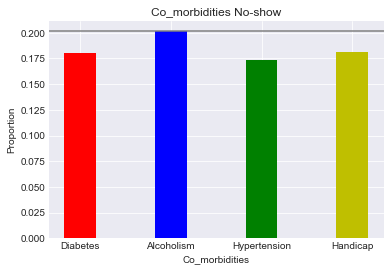

In [22]:
Co_morbidities_list= [Diabetes_proportion,Alcoholism_proportion,Hypertension_proportion,Handicap_proportion]
lables= ['Diabetes','Alcoholism','Hypertension','Handicap']
draw_barchart(lables, Co_morbidities_list, 0.35, ['r','b','g','y'], 'Co_morbidities No-show', 'Co_morbidities', 'Proportion')  

>We can see that the people who have (Diabetes, Hypertension, Handicap) have lower no_show rate, while Alcoholism have no affect on the no_show rates 

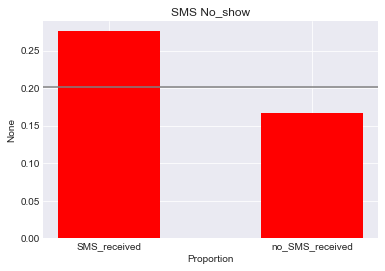

In [23]:
SMS_received_proportion= df.query('No_show == "Yes" & SMS_received == 1 ')['SMS_received'].count()/df.query('SMS_received == 1 ')['Diabetes'].count()
No_SMS_proportion= df.query('No_show == "Yes" & SMS_received == 0 ')['SMS_received'].count()/df.query('SMS_received == 0 ')['Diabetes'].count()
draw_barchart(['SMS_received','no_SMS_received'],(SMS_received_proportion,No_SMS_proportion),0.5,'r'
              ,'SMS No_show', 'Proportion')

>As seen in the graph people who received SMS have higher rate to not show for thier appointments.

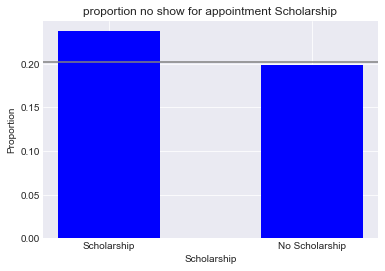

In [24]:
Scholarship_proportion= df.query('No_show == "Yes" & Scholarship == 1 ')['Scholarship'].count()/df.query('Scholarship == 1 ')['Diabetes'].count()
No_Scholarship_proportion= df.query('No_show == "Yes" & Scholarship == 0 ')['Scholarship'].count()/df.query('Scholarship == 0 ')['Diabetes'].count()
draw_barchart(['Scholarship','No Scholarship'],(Scholarship_proportion,No_Scholarship_proportion),0.5,'b'
              ,'proportion no show for appointment Scholarship','Scholarship', 'Proportion')

> patient who have enrolled in Brasilian welfare program have higher rate to not show for thier appointments.

### which day of the week have the most no show proportion?

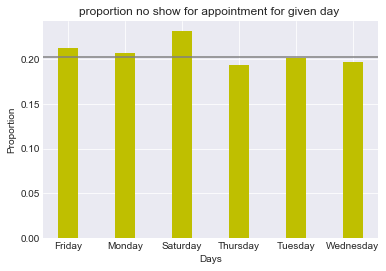

In [25]:
appointments_per_day= df.groupby('AppointmentWeekday')['PatientId'].count()
daily_noshow_proportion= df.query('No_show == "Yes"').groupby('AppointmentWeekday')['PatientId'].count()/appointments_per_day
days=['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']
draw_barchart(days,daily_noshow_proportion,0.35,'y','proportion no show for appointment for given day ','Days','Proportion')

>Saturday have the highest no_show proportion. 

<a id='conclusions'></a>
## Conclusions
>We answered if patient no-show rate is related to gender and age group or a given attribute. However, the data could have been viewed from another prospective,if a no-show history column was provided we could have checked if there is a relation between the No-show history and the situation now. Also, if  there was a column of the number of days before the appiontment we could have checked if there is a relation between no-show rate and the number of days before the appointment, Further more, we could had better results if we have had a column about the severity the of the patients’ disease. Also, the attributes of the patient were discussed without looking to the patient gender or age sub-groups. If done so, we could have got better understanding were no-show rate got affected most at a given gender or age group. The differences in proportion between groups were not very large, so it might be needed to conduct another test (like t test), to evaluate their significance.
